In [1]:
import pandas as pd 
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('./fraud_oracle.csv')
all_data = df.copy()

In [3]:
age_groups = {
    '16-17': 'Young',
    '18-20': 'Young',
    '21-25': 'Young',
    '26-30': 'Young',
    '31-35': 'Middle-aged',
    '36-40': 'Middle-aged',
    '41-50': 'Middle-aged',
    '51-65': 'Senior',
    '65+': 'Senior'
}
all_data['AgeGroup'] = all_data['AgeOfPolicyHolder'].map(age_groups)
all_data.drop(columns=['AgeOfPolicyHolder'], inplace=True)


def categorize_range(value):
    if value == 'less than 20000':
        return 'low'
    elif value in ['20000 to 29000', '30000 to 39000']:
        return 'mid'
    elif value in ['40000 to 59000', '60000 to 69000', 'more than 69000']:
        return 'high'
    else:
        return 'mid'


all_data['VehiclePrice_Cat'] = all_data['VehiclePrice'].apply(categorize_range)


In [4]:

label_encoder = LabelEncoder()


col_ordering = [
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':3,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}},
    {'col':'VehiclePrice','mapping':{'more than 69000':5,'20000 to 29000':1,'30000 to 39000':2,'less than 20000':0,
                                     '40000 to 59000':3,'60000 to 69000':4}},
    {'col':'AgeOfVehicle','mapping':{'new': 0, '2 years': 1, '3 years': 2, '4 years': 3, '5 years': 4, '6 years': 5, '7 years': 6, 'more than 7': 7}},
    {'col':'Year','mapping': {1994: 0, 1995: 1, 1996: 2}},
    {'col':'Days_Policy_Accident','mapping': {'none': 0, '1 to 7': 1,'8 to 15': 2,'15 to 30': 3, 'more than 30': 4}},
    {'col':'Days_Policy_Claim','mapping': {'none': 0, '1 to 7': 1,'8 to 15': 2,'15 to 30': 3, 'more than 30':4 }},
    {'col':'AddressChange_Claim','mapping': {'1 year': 1, 'no change': 0, '4 to 8 years': 4, '2 to 3 years': 2, 'under 6 months': 0.5}},
    {'col':'AgeGroup','mapping': {'Young': 0, 'Middle-aged': 1, 'Senior': 2}},
    {'col':'VehiclePrice_Cat','mapping': {'high': 2, 'mid': 1, 'low': 0}},
    {'col':'NumberOfCars','mapping': {'3 to 4': 3, '1 vehicle': 1, '2 vehicles': 2, '5 to 8': 7, 'more than 8': 9}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

all_data = ord_encoder.fit_transform(all_data)




for col in all_data.columns:
    if all_data[col].dtype == 'object':
        all_data[col] = label_encoder.fit_transform(all_data[col])



c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downc

In [5]:
all_data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AgeGroup,VehiclePrice_Cat
0,2,5,6,6,1,6,5,1,0,2,...,0,0,0,0,1,3,0,2,-1.0,2
1,4,3,6,6,1,2,5,4,1,2,...,1,0,0,0,0,1,0,1,-1.0,2
2,10,5,0,6,1,5,10,2,1,1,...,0,0,0,0,0,1,0,1,-1.0,2
3,6,2,2,17,0,1,6,1,1,1,...,1,0,0,6,0,1,0,2,-1.0,1
4,4,5,1,6,1,6,4,2,0,2,...,0,0,0,0,0,1,0,1,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,0,0,0,0,0,1,2,1,-1.0,1
15416,9,5,4,13,1,1,3,1,1,1,...,0,0,0,6,0,3,2,2,-1.0,1
15417,9,5,4,17,0,1,3,1,1,2,...,0,0,0,1,0,1,2,1,-1.0,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,0,0,6,0,1,2,0,-1.0,1


In [6]:
df.rename(columns = {'FraudFound_P':'Fraud'},inplace = True)
all_data.rename(columns = {'FraudFound_P':'Fraud'},inplace = True)

In [7]:
r = 222
smote = SMOTE(random_state=r)

In [8]:
def split_random_(df):

    x_1, x_2 = train_test_split(df[df.Fraud == 1], test_size=0.05, random_state=222)
    x_3, x_4 = train_test_split(df[df.Fraud == 0 ], test_size = 0.7, random_state=333)
    data_1 = pd.concat([x_1,x_3])
    data_2 = pd.concat([x_2, x_4])
    return data_1, data_2


In [44]:
X, y = all_data.drop(columns='Fraud'), all_data.Fraud

In [45]:
X_, X_test_glob, y_, y_test_glob = train_test_split(X, y, test_size=0.2, random_state=r)

In [46]:
X_1, X_2, y_1, y_2 = train_test_split(X_, y_, test_size=0.5, random_state=42)

In [26]:
target_size =1500

In [ ]:
X_res_1, y_res_1 = X_smote_1[:target_size], y_smote_1[:target_size]
X_res_2, y_res_2 = X_smote_2[:target_size], y_smote_2[:target_size]

In [39]:
print(X_res_1.shape, y_res_1.shape, X_res_2.shape, y_res_2.shape)

(1500, 33) (1500,) (1500, 33) (1500,)


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.272727,0.75,0.000000,0.000000,0.0,0.142857,0.583333,0.50,1.0,0.333333,...,0.0,0.0,0.0,0.166667,0.0,0.0,1.0,0.0,0.0,1.0
1,0.090909,0.00,1.000000,0.500000,1.0,0.142857,0.166667,0.25,1.0,0.333333,...,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,1.0
2,0.727273,0.50,0.000000,0.111111,1.0,0.857143,0.583333,0.00,1.0,0.666667,...,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.5
3,0.363636,0.00,0.500000,0.500000,1.0,0.857143,0.416667,0.00,0.0,0.333333,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.5
4,0.272727,0.75,0.666667,0.944444,1.0,0.142857,0.333333,0.75,1.0,0.666667,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.000000,0.50,0.333333,0.111111,1.0,0.857143,0.083333,0.50,1.0,0.333333,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.5,0.5,0.0,0.5
1496,0.636364,1.00,0.666667,0.500000,1.0,0.285714,0.083333,0.00,0.0,0.333333,...,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.5
1497,0.090909,0.00,1.000000,1.000000,1.0,0.285714,0.166667,0.25,1.0,0.666667,...,0.0,0.0,0.0,0.166667,0.0,0.0,0.5,0.0,0.0,0.5
1498,0.454545,0.25,0.500000,0.944444,0.0,0.857143,0.500000,0.50,0.0,0.333333,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.5,1.0,0.0,0.5


In [47]:
df1 = pd.concat([X_1, y_1],axis=1)
df2 = pd.concat([X_2, y_2],axis=1)


In [13]:
data_1, data_2 = split_random_(df_for_client)

In [14]:
data_1

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AgeGroup,VehiclePrice_Cat,Fraud
767,4,4,2,17,1,7,5,4,1,1,...,0,0,0,0,1,0,1,-1.0,1,1
9690,2,2,6,6,1,1,3,3,1,1,...,0,0,0,2,1,1,1,-1.0,1,1
8603,2,3,6,17,1,5,4,2,1,2,...,0,0,3,0,1,1,1,-1.0,1,1
14457,11,2,0,5,1,6,12,2,1,1,...,0,0,0,0,1,2,0,-1.0,0,1
1054,3,1,0,13,1,1,4,2,1,2,...,0,0,0,0,1,0,0,-1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,9,2,4,13,1,1,10,3,1,2,...,0,0,0,0,1,0,2,-1.0,1,0
7532,9,3,0,9,1,6,10,4,1,2,...,0,0,6,0,1,1,2,-1.0,1,0
3577,5,5,4,13,1,5,6,5,0,1,...,0,0,6,0,1,0,1,-1.0,1,0
5738,2,3,6,17,1,1,5,5,1,2,...,0,0,6,0,1,0,0,-1.0,1,0


Fraud
0    1405
1      95
Name: count, dtype: int64


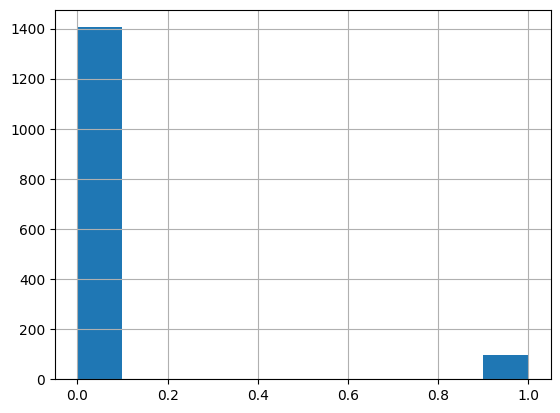

In [32]:
df2.Fraud.hist()
print(df2.Fraud.value_counts())

Fraud
0    1402
1      98
Name: count, dtype: int64


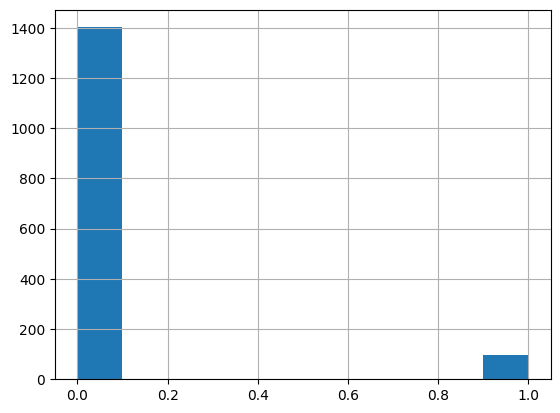

In [33]:
df1.Fraud.hist()
print(df1.Fraud.value_counts())

In [17]:
# data_1.to_csv('df_1.csv', index=False)
# data_2.to_csv('df_2.csv', index=False)


In [18]:
glob_data_test = pd.concat([X_test_glob, y_test_glob], axis=1)
glob_data_test.to_csv('test_glob.csv', index=False)

In [11]:
X_1, X_2, y_1, y_2 = train_test_split(X_, y_, random_state=r) 

In [12]:
df_1 = pd.concat([X_1, y_1], axis=1)
df_2 = pd.concat([X_2, y_2], axis=1)

In [48]:
df1.to_csv('IID_df_1.csv', index=False)
df2.to_csv('IID_df_2.csv', index=False)